In [185]:
import pandas as pd 
import plotly .offline as offline
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [123]:
dataset = pd.read_csv("ChurnPrediction.csv")

In [124]:
print(dataset['BusinessTravel'].value_counts())

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


In [125]:
print(dataset['Department'].value_counts())

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


In [126]:
print(dataset['EducationField'].value_counts())

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


In [127]:
print(dataset['JobRole'].value_counts())

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


In [128]:
print(dataset['MaritalStatus'].value_counts())

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


In [129]:
# Plotting Correlation Heatmap
corrs = dataset.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
offline.plot(figure,filename='corrheatmap.html')

'corrheatmap.html'

# Converting Categorical Values into Numeric

In [130]:
# Converting Categorical features into Numerical features for binary Object Values(i.e OverTime,PastEmployee,MaritalStatus,Gender)
def converter(column):
    if column == 'Yes':
        return 1
    else:
        return 0
def convertAge(column):
    if column <=39:
        return 1
    else:
        return 0

In [131]:
print(dataset['Age'].value_counts())
dataset['Age']=dataset['Age'].apply(convertAge)
print(dataset['Age'].value_counts())

35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
1    948
0    522
Name: Age, dtype: int64


In [132]:
dataset['PastEmployee'] = dataset['PastEmployee'].apply(converter)
dataset['OverTime'] = dataset['OverTime'].apply(converter)
dataset['Gender']=dataset['Gender'].map({'Male':0,'Female':1})

In [133]:
# Plotting Correlation Heatmap
corrs = dataset.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
offline.plot(figure,filename='corrheatmap.html')

'corrheatmap.html'

In [134]:
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
final_data = pd.get_dummies(dataset, columns = categorical_features)

In [135]:
print(final_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   PastEmployee                       1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   JobInvolvement                     1470 non-null   int64
 6   JobLevel                           1470 non-null   int64
 7   JobSatisfaction                    1470 non-null   int64
 8   MonthlyIncome                      1470 non-null   int64
 9   NumCompaniesWorked                 1470 non-null   int64
 10  OverTime                           1470 non-null   int64
 11  PercentSalaryHike                  1470 non-null   int64
 12  PerformanceRating   

In [137]:
# Dividing dataset into label and feature sets
X = final_data.drop('PastEmployee', axis = 1) # Features
Y = final_data['PastEmployee'] # Labels
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(1470, 46)
(1470,)


In [140]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

In [141]:
# Dividing dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split( X_scaled, Y, test_size = 0.3, random_state = 100)

print(X_train.shape)
print(X_test.shape)

(1029, 46)
(441, 46)


Number of observations in each class before oversampling (training data): 
 0    859
1    170
Name: PastEmployee, dtype: int64


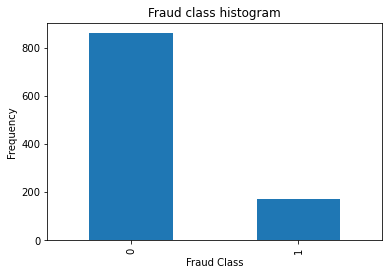

In [145]:
# Implementing Oversampling to balance the dataset; SMOTE stands for Synthetic Minority Oversampling TEchnique
print("Number of observations in each class before oversampling (training data): \n", pd.Series(Y_train).value_counts())

pd.value_counts(pd.Series(Y_train)).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Fraud Class')
plt.ylabel('Frequency')
plt.show()

In [146]:
smote = SMOTE(random_state = 101)
X_train,Y_train = smote.fit_sample(X_train,Y_train)

Number of observations in each class after oversampling (training data): 
 1    859
0    859
Name: PastEmployee, dtype: int64


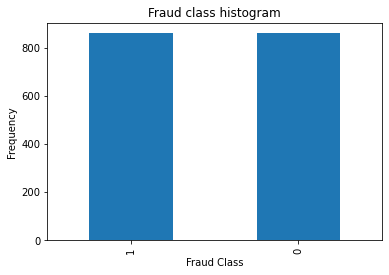

In [147]:
print("Number of observations in each class after oversampling (training data): \n", pd.Series(Y_train).value_counts())
pd.value_counts(pd.Series(Y_train)).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Fraud Class')
plt.ylabel('Frequency')
plt.show()

In [151]:
from xgboost import XGBClassifier 

In [192]:
model = XGBClassifier()

In [193]:
model.fit(X_train, Y_train)

XGBClassifier()

In [194]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [195]:
from sklearn.metrics import roc_auc_score,accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc,mean_absolute_error
from sklearn.metrics import r2_score

In [196]:
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.53%


In [197]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

t1=time()
gsearch1.fit(X_train,Y_train)
print("Predicting time:", round(time()-t1, 3), "s")
best_parameters = gsearch1.best_params_
print(best_parameters)

best_result = gsearch1.best_score_ # Mean cross-validated score of the best_estimator
print(best_result)

C:\Users\Tirth\anaconda3\envs\py36\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning:

The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.



Predicting time: 13.353 s
{'max_depth': 9, 'min_child_weight': 1}
0.9826591503547041


In [198]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

t1=time()
gsearch2.fit(X_train,Y_train)
print("Predicting time:", round(time()-t1, 3), "s")
best_parameters = gsearch2.best_params_
print(best_parameters)

best_result = gsearch2.best_score_ # Mean cross-validated score of the best_estimator
print(best_result)

C:\Users\Tirth\anaconda3\envs\py36\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning:

The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.



Predicting time: 7.265 s
{'max_depth': 6, 'min_child_weight': 5}
0.9789476846975921


In [199]:
param_test2b = {
 'min_child_weight':[1,2,3,4],
    'max_depth':[9,11,13,15],
    'gamma':[i/10.0 for i in range(0,5)]
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=4,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
t1=time()
gsearch2b.fit(X_train,Y_train)
print("Predicting time:", round(time()-t1, 3), "s")
best_parameters = gsearch2b.best_params_
print(best_parameters)

best_result = gsearch2b.best_score_ # Mean cross-validated score of the best_estimator
print(best_result)

C:\Users\Tirth\anaconda3\envs\py36\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning:

The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.



Predicting time: 98.483 s
{'gamma': 0.0, 'max_depth': 11, 'min_child_weight': 1}
0.9836934537081843


In [200]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from sklearn.ensemble import AdaBoostClassifier
n_estimators = [75,80,85,90]
random_grid = {'n_estimators': n_estimators            
               }
pprint(random_grid)
model = AdaBoostClassifier()
rf_random = RandomizedSearchCV(estimator=model, scoring='accuracy', param_distributions=random_grid, n_iter=50, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
t1=time()
rf_random.fit(X_train, Y_train)
print("Predicting time:", round(time()-t1, 3), "s")
print(rf_random.best_params_)
print(rf_random.best_estimator_)
print(rf_random.best_score_)

{'n_estimators': [75, 80, 85, 90]}
Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\Tirth\anaconda3\envs\py36\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning:

The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    3.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.6s finished


Predicting time: 4.178 s
{'n_estimators': 80}
AdaBoostClassifier(n_estimators=80)
0.873150555087728


In [201]:
import lightgbm as lgb
from time import time

In [202]:
max_depth = [int(x) for x in np.linspace(10, 50, num=11)]
max_depth.append(None)
num_leaves=[5,10,15,20,25,30]
boosting = ['gbdt','rf','dart','goss']
max_bin =[300,400,500,600]
n_estimators = [30, 40, 50, 60, 70, 80]
learning_rate = [0.002,0.003,0.004,0.005]
random_grid = {'max_bin' : max_bin,
               'learning_rate' : learning_rate,
               'n_estimators'  : n_estimators,
               'num_leaves'    : num_leaves,
               'max_depth'     : max_depth,
               'boosting'      : boosting
               }
pprint(random_grid)
model = lgb.LGBMClassifier()
lgb_random = RandomizedSearchCV(estimator=model, param_distributions=random_grid, n_iter=50, cv=3,
                               verbose=2, n_jobs=-1)
t1=time()
lgb_random.fit(X_train, Y_train)
print("Predicting time:", round(time()-t1, 3), "s")
print(lgb_random.best_params_)
print(lgb_random.best_estimator_)
print(lgb_random.best_score_)

{'boosting': ['gbdt', 'rf', 'dart', 'goss'],
 'learning_rate': [0.002, 0.003, 0.004, 0.005],
 'max_bin': [300, 400, 500, 600],
 'max_depth': [10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, None],
 'n_estimators': [30, 40, 50, 60, 70, 80],
 'num_leaves': [5, 10, 15, 20, 25, 30]}
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 135 out of 150 | elapsed:    3.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    4.2s finished


Predicting time: 4.501 s
{'num_leaves': 30, 'n_estimators': 70, 'max_depth': 46, 'max_bin': 400, 'learning_rate': 0.004, 'boosting': 'gbdt'}
LGBMClassifier(boosting='gbdt', learning_rate=0.004, max_bin=400, max_depth=46,
               n_estimators=70, num_leaves=30)
0.8457836520663745
